## MACHINE LEARNING DAY - 17 : Clustering

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

### What is **Clustering**?

**Clustering** is an **unsupervised machine learning technique** used to **group similar data points together** based on certain features. The goal is to divide a dataset into groups (called **clusters**) such that:

* **Data points within the same cluster are very similar** to each other.
* **Data points in different clusters are very different** from each other.

Clustering is used when the data **doesn't have labels** (i.e., we don't know the categories or classes in advance).

---

### Example:

Imagine you have data about people including age, income, and spending habits. You want to divide them into customer segments, but you don’t have labels like “high spender”, “budget shopper”, etc.
Clustering will automatically group them based on similarities in the features.

---

### Common Clustering Algorithms:

1. **K-Means Clustering**

   * Divides the data into **K** clusters.
   * Each data point belongs to the cluster with the nearest **centroid** (center of the cluster).
   * You need to specify the number of clusters **K** beforehand.

2. **Hierarchical Clustering**

   * Creates a **tree of clusters** (called a dendrogram).
   * Doesn’t require the number of clusters in advance.
   * Can be **agglomerative** (bottom-up) or **divisive** (top-down).

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

   * Groups points that are close to each other **based on a distance metric and a minimum number of neighbors**.
   * Can detect **arbitrary-shaped clusters** and handle **noise/outliers**.

---

### Applications of Clustering:

* Customer segmentation
* Image segmentation
* Market research
* Social network analysis
* Document or news grouping

### What is **K-Means Clustering**?

**K-Means Clustering** is an **unsupervised machine learning algorithm** used to group a dataset into **K distinct clusters** based on feature similarity.

It is widely used for tasks where the goal is to find structure or patterns in **unlabeled data**.

---

### Key Idea:

The algorithm aims to partition the data into **K groups**, where each group (called a cluster) has a **centroid** (a center point), and each data point belongs to the cluster with the **nearest centroid**.

---

### Steps of the K-Means Algorithm:

1. **Choose the number of clusters (K)**
   Decide how many clusters you want the data to be divided into.

2. **Initialize K centroids**
   Randomly select K points from the dataset as the starting centroids.

3. **Assign each data point to the nearest centroid**
   This forms K clusters based on the closest distance (usually Euclidean distance).

4. **Recalculate the centroids**
   For each cluster, calculate the new centroid by taking the **mean of all data points** in that cluster.

5. **Repeat steps 3 and 4**
   Continue reassigning points and updating centroids until the assignments **no longer change** or a **maximum number of iterations** is reached.

---

### Example:

Suppose you have the following 2D points:
`(1, 2), (2, 1), (9, 10), (10, 9)`
If you choose `K = 2`, the algorithm will group them into two clusters — one near (1, 2) and the other near (10, 9) — based on proximity.

---

### Characteristics:

* **Unsupervised**: No predefined labels or output.
* **Distance-based**: Often uses Euclidean distance.
* **Centroid-based**: Each cluster is defined by its center point (mean).

---

### Advantages:

* Simple and fast
* Works well on large datasets with clearly separated clusters

---

### Limitations:

* You must specify the number of clusters (K) in advance
* Assumes clusters are spherical and evenly sized
* Sensitive to outliers and initial centroid placement
* May converge to local minima

---

### Common Applications:

* Market/customer segmentation
* Image compression and segmentation
* Document or news article grouping
* Pattern recognition

### Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [8]:
df= pd.read_csv('../datasets/Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values

### Using elbow method to find optimal numbers of clusters

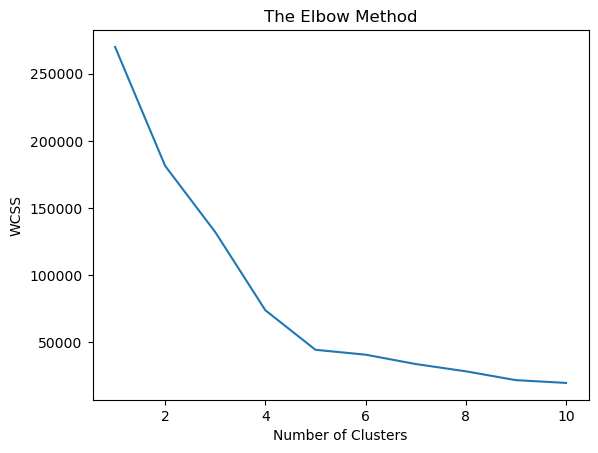

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K Means model on the dataset

In [12]:
kmeans = KMeans(n_clusters = 5, init='k-means++',n_init = 'auto', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### Visualising the Clusters

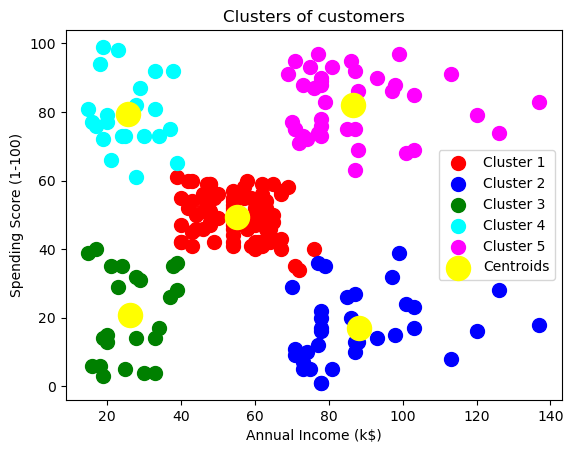

In [14]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### What is Hierarchical Clustering?

**Hierarchical Clustering** is an **unsupervised machine learning algorithm** used to group similar data points into clusters based on their similarity or distance. Unlike K-Means, it **does not require specifying the number of clusters** in advance. Instead, it builds a hierarchy of clusters represented in a **tree-like diagram** called a **dendrogram**.

---

### Types of Hierarchical Clustering

#### 1. Agglomerative Clustering (most common)

* **Bottom-up approach**
* Starts with each data point as its own cluster
* Repeatedly merges the **closest clusters** until all points belong to one cluster

#### 2. Divisive Clustering

* **Top-down approach**
* Starts with all data in one cluster
* Recursively splits clusters into smaller ones

---

#### Steps in Agglomerative Hierarchical Clustering

1. Compute the distance (or similarity) between every pair of points
2. Build a **distance matrix**
3. Merge the two closest points or clusters
4. Update the distance matrix
5. Repeat steps 3–4 until only one cluster remains
6. Plot a **dendrogram** to visualize how clusters were merged
7. Cut the dendrogram at a certain height to choose the number of clusters

---

### Distance Metrics and Linkage Methods

### Distance Metrics:

* Euclidean (most common)
* Manhattan
* Cosine

### Linkage Criteria:

* **Single linkage**: distance between the **closest** points in clusters
* **Complete linkage**: distance between the **farthest** points
* **Average linkage**: average distance between all pairs of points in two clusters
* **Ward’s method**: minimizes the total variance within each cluster (used by default in `scikit-learn`)

---

### Dendrogram

* A dendrogram is a tree diagram that shows how and when clusters are merged
* The **height of the connection** between two points indicates the **distance** between them
* You can draw a horizontal line across the dendrogram to decide where to "cut" the tree to form clusters

---

### When to Use Hierarchical Clustering

* When the number of clusters is unknown
* When you want to understand the **nested structure** of the data
* Best suited for **small to medium-sized** datasets
* When you want a visual interpretation of clustering behavior

---

### Pros and Cons

| Advantages                              | Disadvantages                                |
| --------------------------------------- | -------------------------------------------- |
| No need to specify number of clusters   | Computationally expensive for large datasets |
| Produces a hierarchy for interpretation | Sensitive to noise and outliers              |
| Dendrogram offers detailed insight      | Less scalable than K-Means                   |

### Using the dendrogram to find the optimal number of clusters

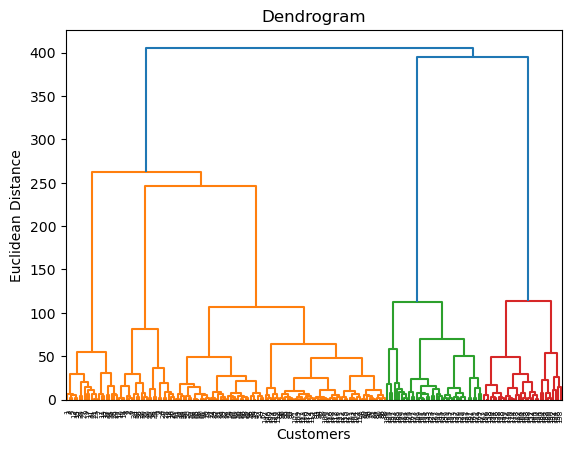

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

### Training the Hierarchical Clustering model on the dataset

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### Visualising the clusters

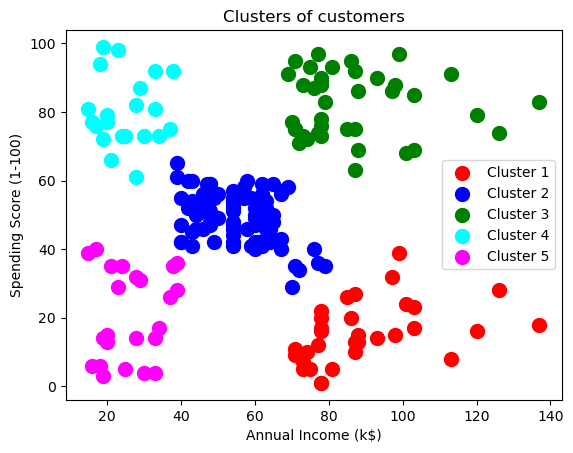

In [21]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()